# Proyek Analisis Data: Air Quality Dataset  
 
- **Nama:** RAKHA APTA PRADHANA D R
- **Email:** rakhapta@student.ub.ac.id
- **ID Dicoding:** rakhapta


## Menentukan Pertanyaan Bisnis

#### Pemilihan Distrik untuk Analisis

Sebelum menentukan pertanyaan bisnis, saya terlebih dahulu menggali deskripsi umum dari dataset ini untuk memahami struktur dan cakupan datanya. Setelah menelusuri variabel yang tersedia, saya menemukan bahwa dataset mencakup data polusi udara dari berbagai distrik di Beijing.  

Untuk analisis lebih mendalam, saya memilih tiga distrik utama dengan mempertimbangkan variasi karakteristik geografis dan tingkat urbanisasi. Saya memilih distrik yang memiliki perbedaan signifikan baik dari segi kepadatan penduduk, aktivitas industri, maupun kondisi lingkungan agar analisis dapat mencerminkan dinamika polusi udara yang lebih luas di Beijing.  

Berdasarkan pertimbangan tersebut, saya memutuskan untuk fokus pada distrik **Tiantan, Dongsi, dan Huairou**, yang mewakili wilayah dengan karakteristik yang berbeda, memungkinkan eksplorasi lebih mendalam terhadap faktor-faktor yang memengaruhi kualitas udara di setiap lokasi.


- Q1: Which district experiences the highest PM2.5 levels?

- Q2: Does meteorological factor effects PM2.5 pollution?

- Q3: Are there specific hours of the day with dangerous PM2.5 levels?


## Import Semua Packages/Library yang Digunakan

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load datasets
datasets = {
    "Dongsi": pd.read_csv("data/dongsi.csv"),
    "Huairou": pd.read_csv("data/huairou.csv"),
    "Tiantan": pd.read_csv("data/tiantan.csv"),
}

In [27]:
# Displaying a few rows of each dataset
for name, df in datasets.items():
    print(f"{name} Data:")
    display(df.head())
    print("\n" + "="*130 + "\n")  # Just for better readability


Dongsi Data:


No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi



Huairou Data:


No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou



Tiantan Data:


No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan

In [28]:
# Numerical columns for analysis
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

## Data Wrangling

### Gathering Data

In [29]:
for name, df in datasets.items():
    print(f"📌 Dataset: {name}")
    print("Data Shape:", df.shape)
    display(df.info())
    print("\n" + "="*50 + "\n")

📌 Dataset: Dongsi
Data Shape: (35064, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



📌 Dataset: Huairou
Data Shape: (35064, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



📌 Dataset: Tiantan
Data Shape: (35064, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None

**Insight:**
1. **Keseragaman Struktur Dataset**  
   - Ketiga dataset memiliki jumlah entri yang sama (35.064 baris) dan terdiri dari 18 kolom dengan tipe data yang seragam, yaitu `int64` untuk tanggal dan waktu, `float64` untuk data polusi dan cuaca, serta `object` untuk arah angin (`wd`).  
   - Ini menunjukkan bahwa dataset telah terstruktur dengan baik dan memungkinkan analisis komparatif antar distrik tanpa perlu banyak preprocessing tambahan.

2. **Kehadiran Missing Values pada Beberapa Kolom**  
   - Beberapa kolom mengalami missing values, terutama pada variabel polutan seperti PM2.5, PM10, SO2, NO2, CO, dan O3.  
   - Meskipun jumlah missing values tidak terlalu besar, hal ini tetap perlu diperhatikan saat melakukan analisis agar tidak mengganggu hasil yang diperoleh.

3. **Tipe Data yang Sesuai untuk Analisis**  
   - Semua kolom memiliki tipe data yang sesuai dengan nilai yang dikandungnya, misalnya variabel numerik seperti suhu (`TEMP`), tekanan (`PRES`), dan kecepatan angin (`WSPM`) sudah bertipe `float64`.  
   - Namun, kolom `wd` (arah angin) yang bertipe `object` mungkin memerlukan transformasi lebih lanjut jika ingin dianalisis secara numerik.

### Assessing Data

📌 Data Distribution for Dongsi


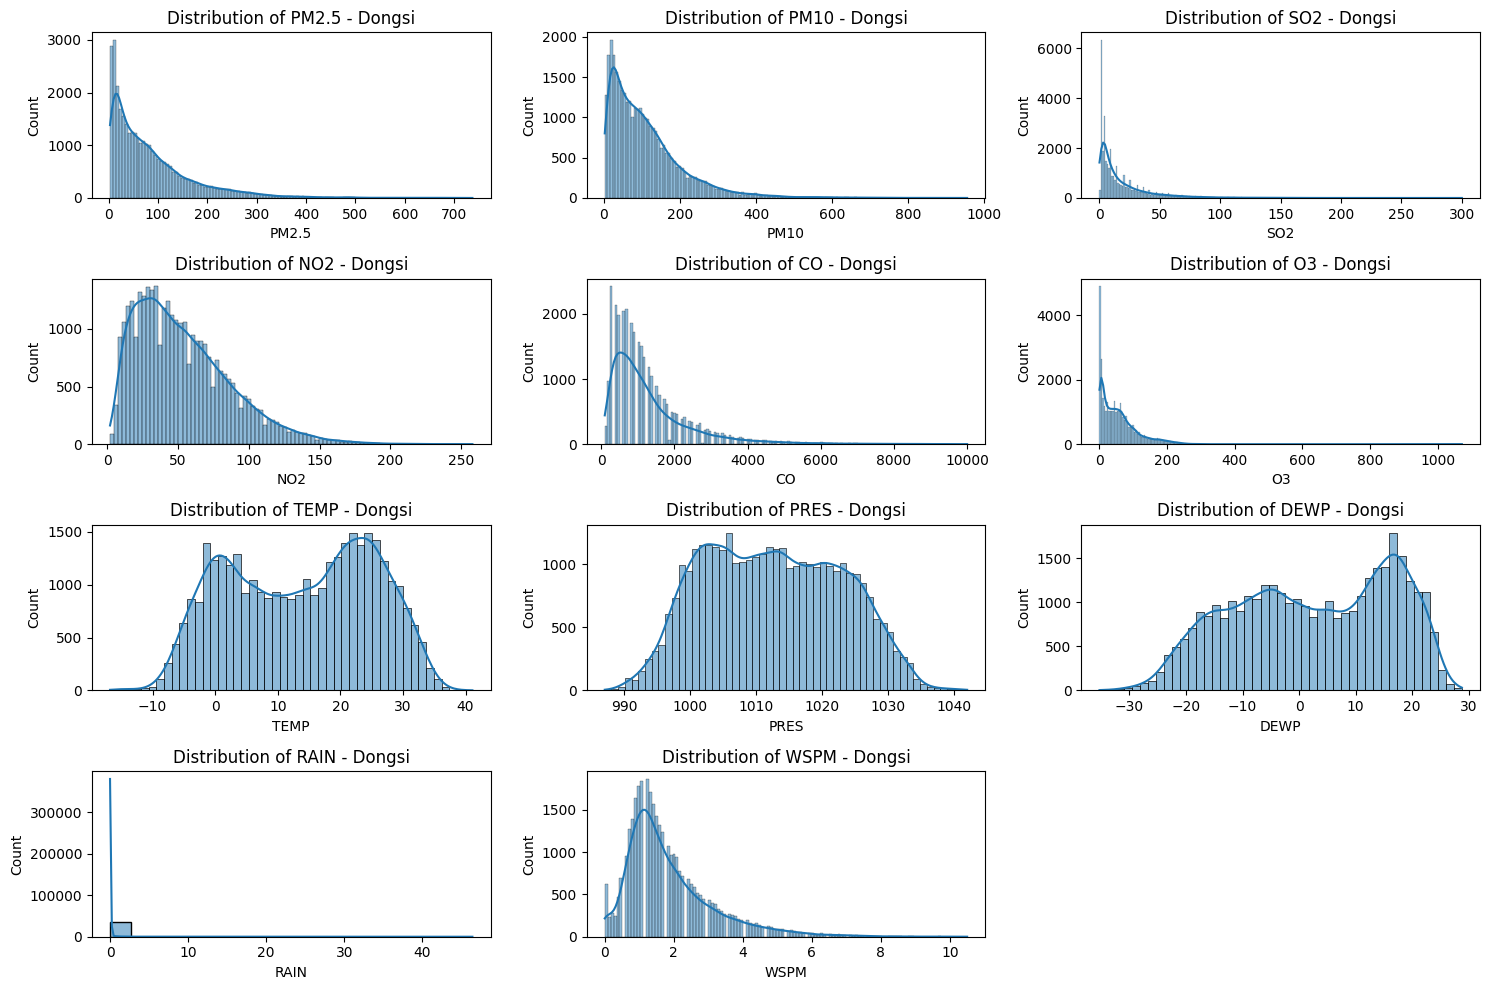

📌 Data Distribution for Huairou


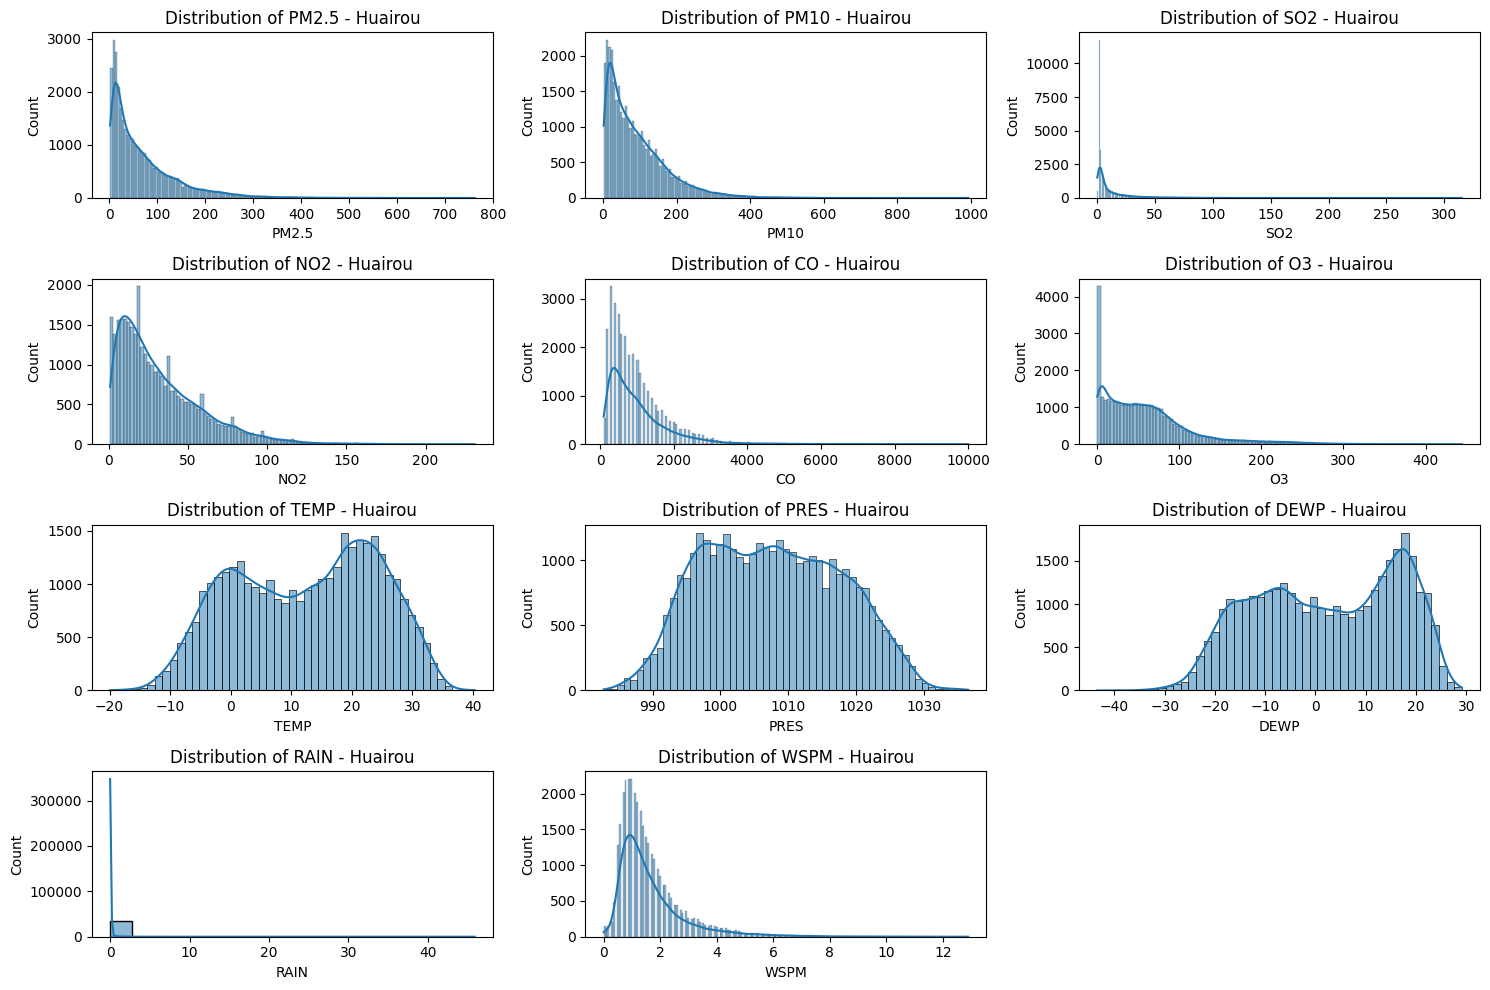

📌 Data Distribution for Tiantan


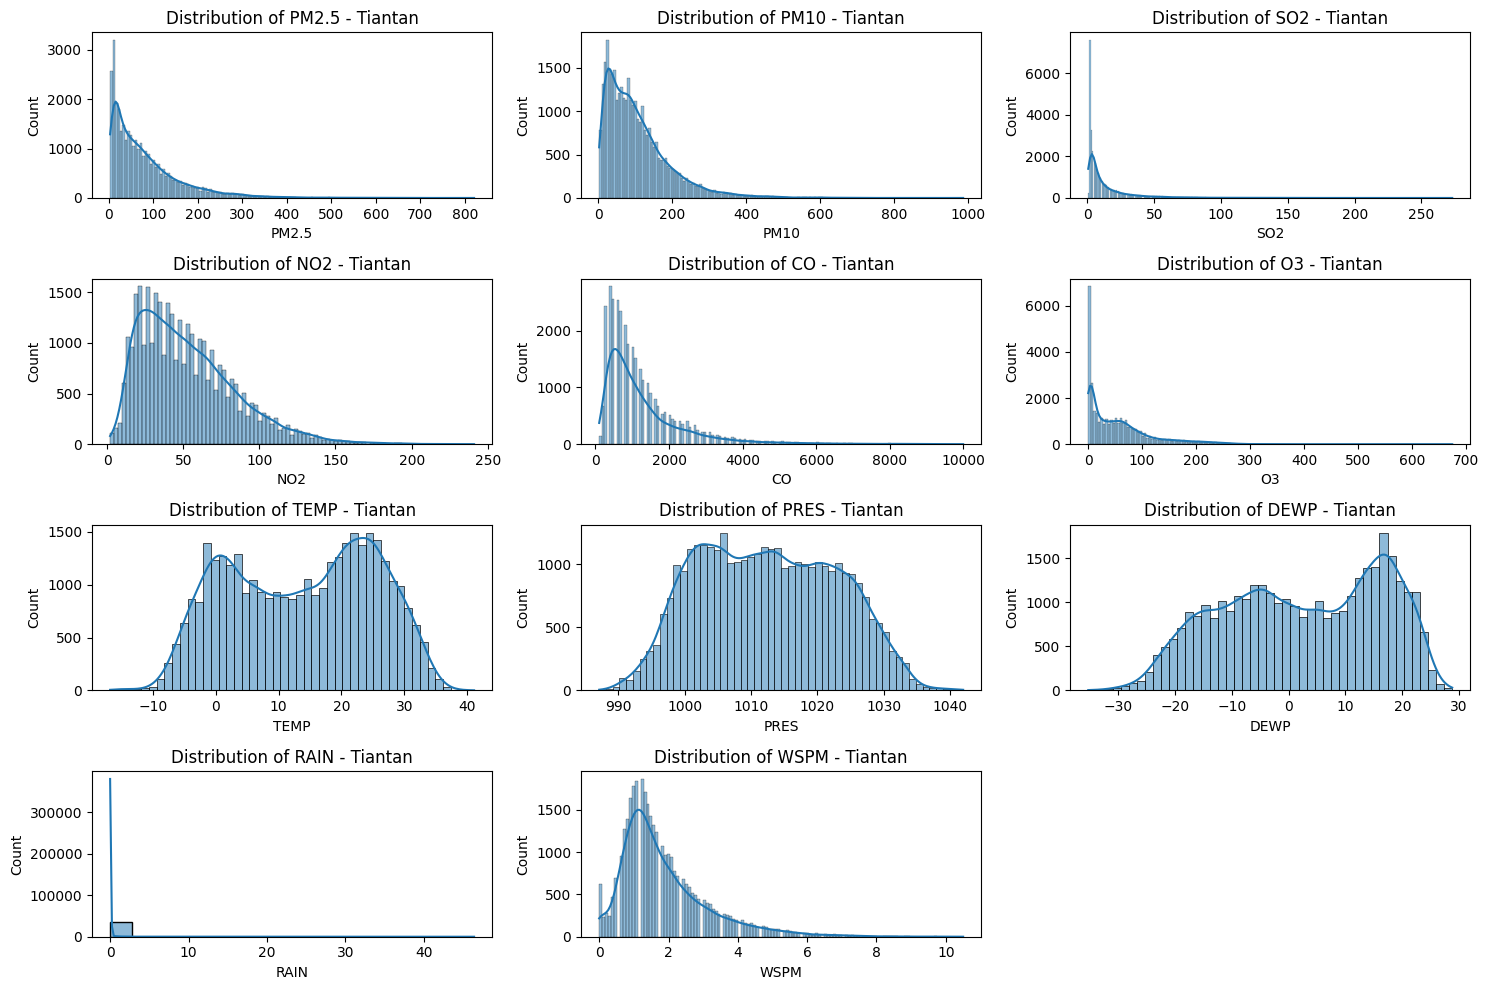

In [30]:
for name, df in datasets.items():
    print(f"📌 Data Distribution for {name}")

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols):
        plt.subplot(4, 3, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} - {name}')
    plt.tight_layout()
    plt.show()

In [31]:
for name, df in datasets.items():
    print(f"📊 Summary Statistics for {name}:")
    display(df.describe())
    
    # Mengecek jumlah duplikasi
    print(f"Jumlah duplikasi di {name}: {df.duplicated().sum()}")
    
    print("\n" + "="*200 + "\n")

📊 Summary Statistics for Dongsi:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655     33.959230   1191.305887   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      4.000000     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    151.000000     24.000000     73.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      57.210637     13.671490   1012.547419      2.447535      0.064020   
std       58.033275     11.458418     10.266059     13.810696      0.786282   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       12.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

Jumlah duplikasi di Dongsi: 0


📊 Summary Statistics for Huairou:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000   
mean      69.626367     91.482690     12.121553     32.497250   1022.554545   
std       71.224916     83.289578     18.896912     26.489531    898.738241   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       17.000000     28.000000      2.000000     12.000000    400.000000   
50%       47.000000     69.000000      4.000000     25.000000    800.000000   
75%       98.000000    131.000000     14.000000     46.000000   1300.000000   
max      762.000000    993.000000    315.000000    231.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33913.000000  35013.000000  35011.000000  35011.000000  35009.000000   
mean      59.824713     12.445426   1007.598568      2.238619      0.067940   
std       54.605746     11.751103     10.022101     14.052541      0.849046   
min        0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%       18.000000      2.100000    999.300000     -9.600000      0.000000   
50%       49.000000     13.600000   1007.300000      2.700000      0.000000   
75%       83.000000     22.300000   1015.500000     15.300000      0.000000   
max      444.000000     40.300000   1036.500000     29.100000     45.900000   

               WSPM  
count  35015.000000  
mean       1.652021  
std        1.199143  
min        0.000000  
25%        0.900000  
50%        1.300000  
75%        2.000000  
max       12.900000

Jumlah duplikasi di Huairou: 0


📊 Summary Statistics for Tiantan:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34387.000000  34467.000000  33946.000000  34320.000000  33938.000000   
mean      82.164911    106.363672     14.367615     53.162646   1298.303318   
std       80.921384     89.700157     20.144631     31.946224   1170.593297   
min        3.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     41.000000      3.000000     28.000000    500.000000   
50%       59.000000     85.000000      7.000000     47.000000    900.000000   
75%      113.000000    144.000000     17.000000     71.000000   1600.000000   
max      821.000000    988.000000    273.000000    241.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34221.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.984297     13.671490   1012.547419      2.447535      0.064020   
std       59.081528     11.458418     10.266059     13.810696      0.786282   
min        0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%        8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       40.000000     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max      674.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

Jumlah duplikasi di Tiantan: 0




In [32]:
for name, df in datasets.items():
    print(f"📌 Missing values in {name}:")
    print(df.isnull().sum())

📌 Missing values in Dongsi:
No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64
📌 Missing values in Huairou:
No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64
📌 Missing values in Tiantan:
No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


📌 Correlation Analysis for Dongsi


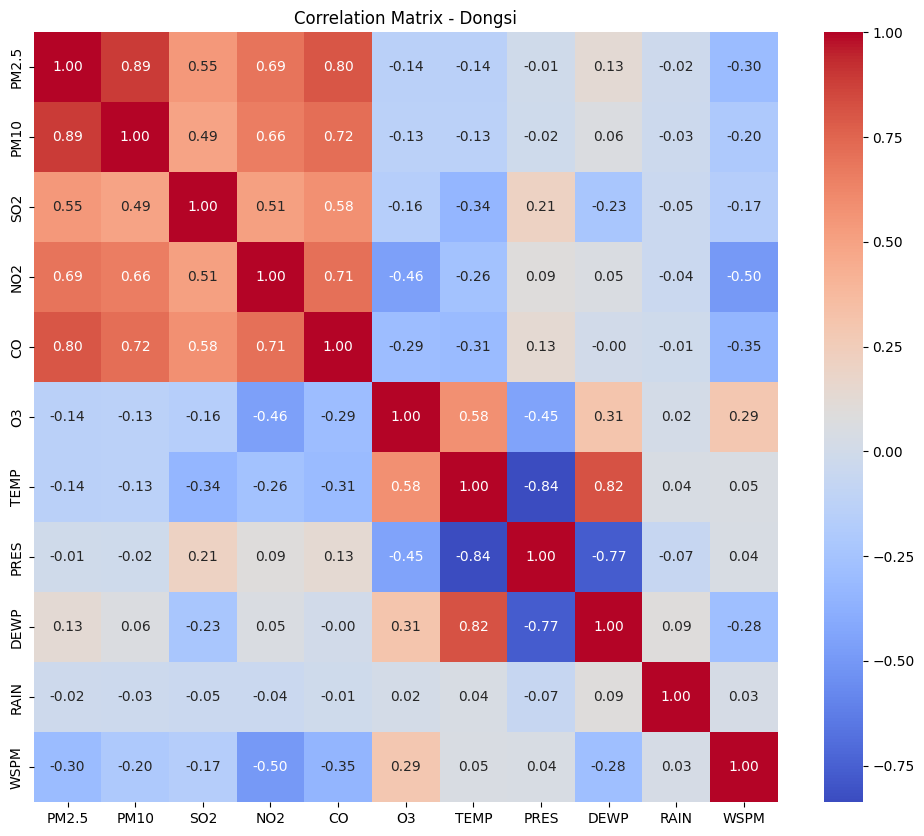

📌 Correlation Analysis for Huairou


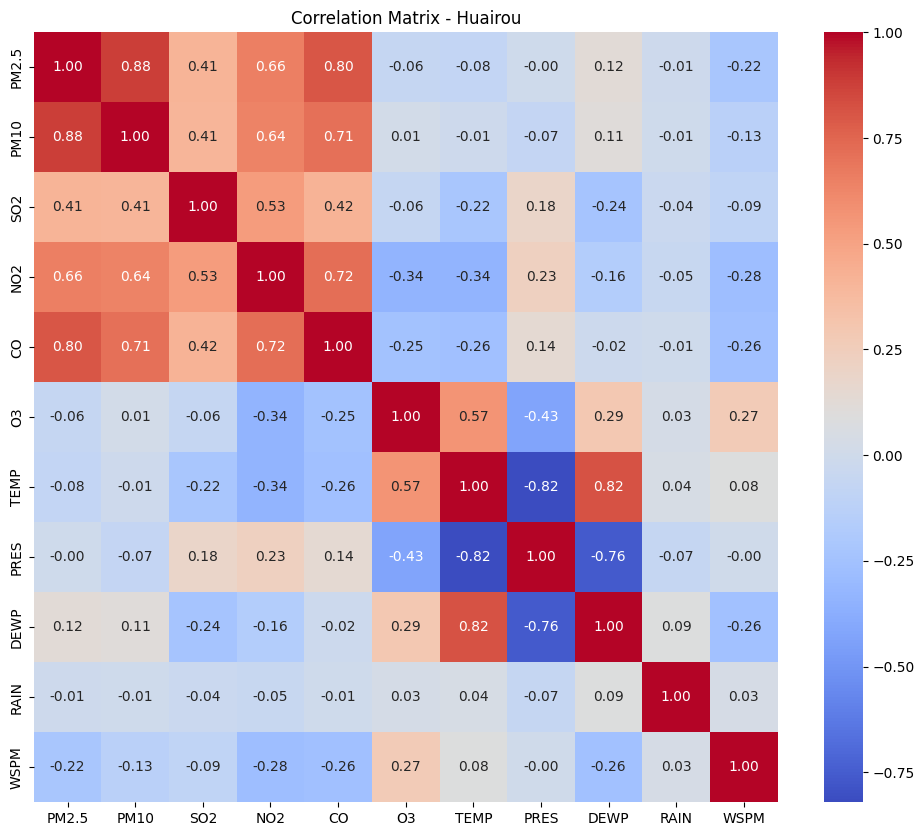

📌 Correlation Analysis for Tiantan


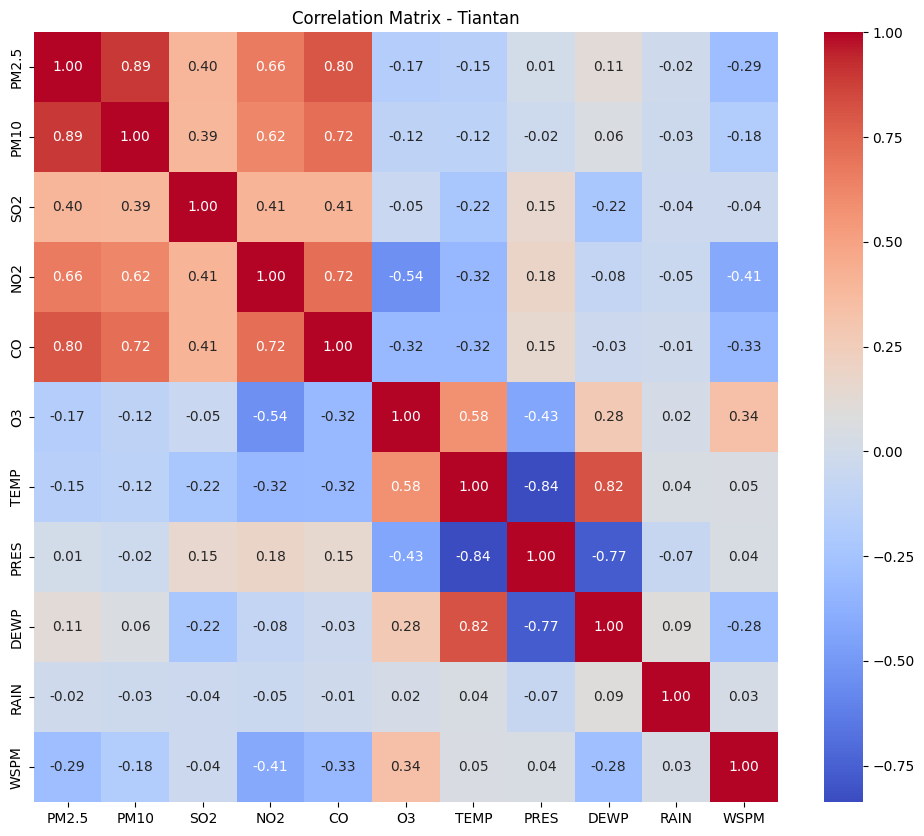

In [33]:
for name, df in datasets.items():
    print(f"📌 Correlation Analysis for {name}")

    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix - {name}')
    plt.show()

**Insight:**
- Tidak ada duplikasi (bagus).
- **Keberadaan Missing Values yang Perlu Penanganan**  
   - Beberapa kolom memiliki nilai yang hilang (`null`), terutama pada polutan udara seperti **PM2.5, PM10, SO2, NO2, CO, dan O3**.  
   - Setiap distrik memiliki jumlah missing values yang berbeda, sehingga perlu strategi penanganan yang sesuai, seperti **imputasi dengan median atau interpolasi**.

- **Potensi Inkonsistensi dalam Data Kategorikal**  
   - Kolom **wd** (arah angin) bertipe `object`, sehingga ada kemungkinan variasi penulisan atau kesalahan input.  
   - Perlu dicek apakah ada **duplikasi nilai dalam format berbeda** (misalnya, "NW" vs "North-West") atau karakter yang tidak valid.

- **Distribusi Data Waktu yang Konsisten**  
   - Variabel waktu (`year`, `month`, `day`, `hour`) memiliki data yang lengkap dan tidak ada anomali seperti tanggal di luar rentang yang valid.  
   - Ini menunjukkan bahwa dataset memiliki cakupan waktu yang utuh, yang mempermudah analisis tren polusi berdasarkan waktu.

### Cleaning Data

In [34]:
for name, df in datasets.items():
    datasets[name] = df[['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']] #Hanya pakai PM2.5 saja untuk indeks polutannya
    print(f"✅ {name} dataset cleaned. New shape: {datasets[name].shape}")

✅ Dongsi dataset cleaned. New shape: (35064, 11)
✅ Huairou dataset cleaned. New shape: (35064, 11)
✅ Tiantan dataset cleaned. New shape: (35064, 11)


In [35]:
for name, df in datasets.items():
    # Mengisi missing values dengan median
    datasets[name] = df.fillna(df.median())
    print(f"📌 Missing values in {name}:")
    print(df.isnull().sum())
    print(f"✅ Missing values handled for {name}\n")

📌 Missing values in Dongsi:
No         0
year       0
month      0
day        0
hour       0
PM2.5    750
TEMP      20
PRES      20
DEWP      20
RAIN      20
WSPM      14
dtype: int64
✅ Missing values handled for Dongsi

📌 Missing values in Huairou:
No         0
year       0
month      0
day        0
hour       0
PM2.5    953
TEMP      51
PRES      53
DEWP      53
RAIN      55
WSPM      49
dtype: int64
✅ Missing values handled for Huairou

📌 Missing values in Tiantan:
No         0
year       0
month      0
day        0
hour       0
PM2.5    677
TEMP      20
PRES      20
DEWP      20
RAIN      20
WSPM      14
dtype: int64
✅ Missing values handled for Tiantan



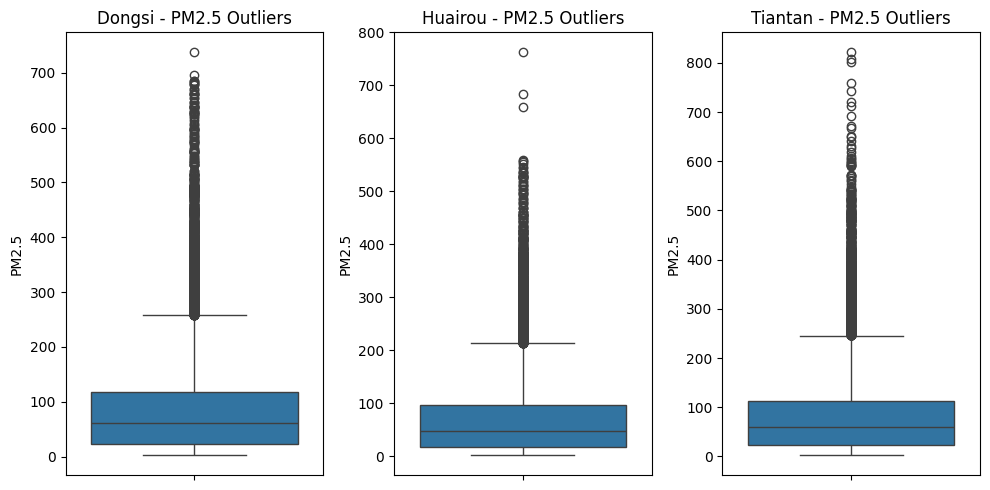

In [36]:
plt.figure(figsize=(10, 5))
for i, (name, df) in enumerate(datasets.items()):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df['PM2.5'])
    plt.title(f"{name} - PM2.5 Outliers")
plt.tight_layout()
plt.show()

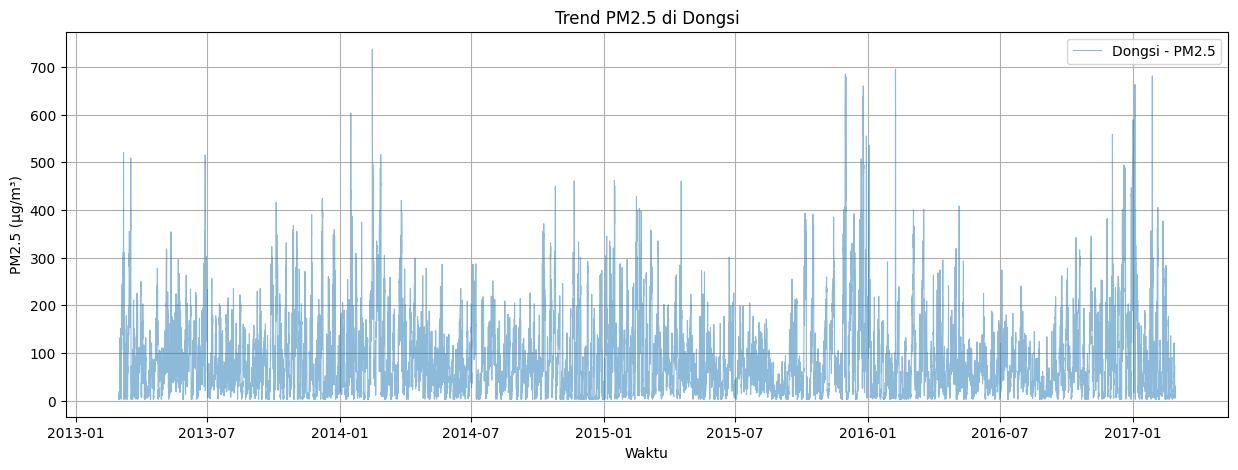

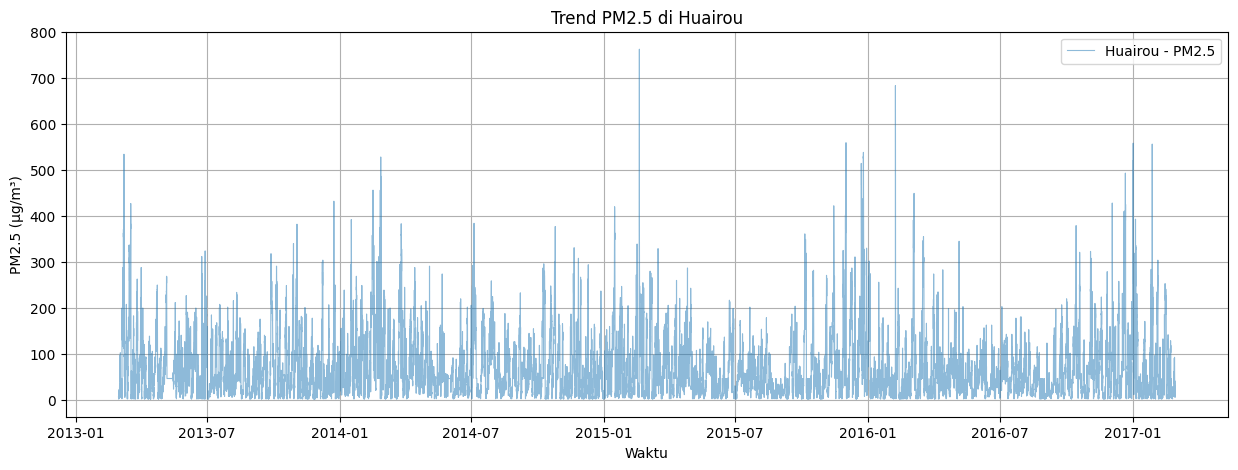

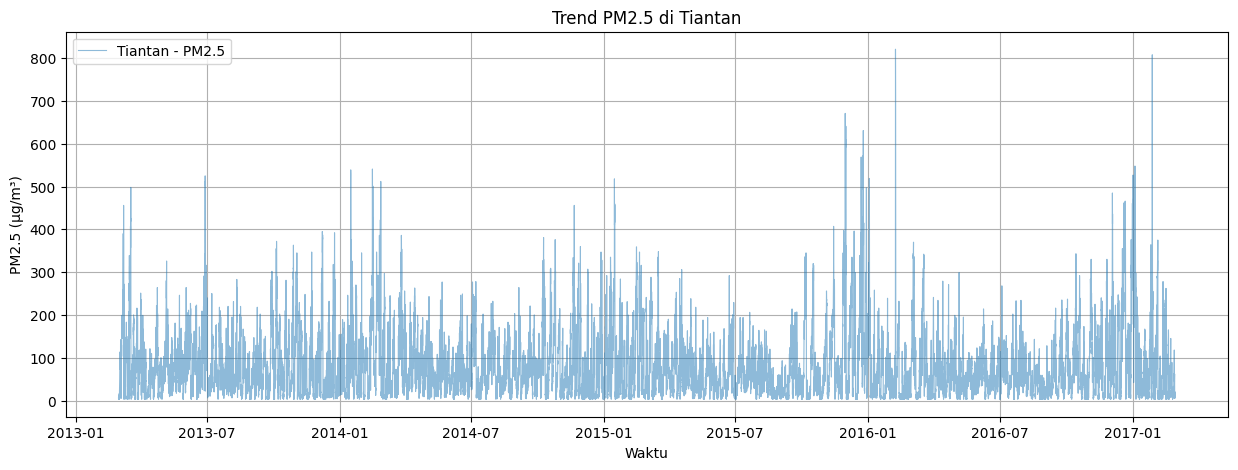

In [37]:
# Check apakah outlier benar benar outlier
for name, df in datasets.items():
    # Buat kolom datetime
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    
    # Plot time-series
    plt.figure(figsize=(15, 5))
    plt.plot(df['datetime'], df['PM2.5'], alpha=0.5, label=f"{name} - PM2.5", linewidth=0.8)
    
    # Atur judul dan label
    plt.title(f"Trend PM2.5 di {name}")
    plt.xlabel("Waktu")
    plt.ylabel("PM2.5 (µg/m³)")
    plt.legend()
    plt.grid(True)
    plt.show()


In [38]:
for name, df in datasets.items():
    Q1 = df["PM2.5"].quantile(0.25)
    Q3 = df["PM2.5"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df["PM2.5"] < lower_bound) | (df["PM2.5"] > upper_bound)]
    print(f"{name} - Jumlah outlier: {len(outliers)}")

Dongsi - Jumlah outlier: 1739
Huairou - Jumlah outlier: 1765
Tiantan - Jumlah outlier: 1678


Dongsi dataset setelah IQR filtering. New max: 258.0


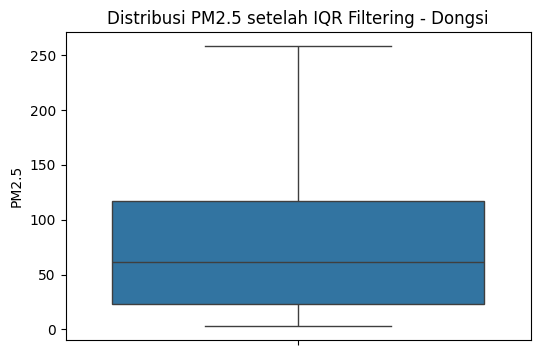

Huairou dataset setelah IQR filtering. New max: 213.0


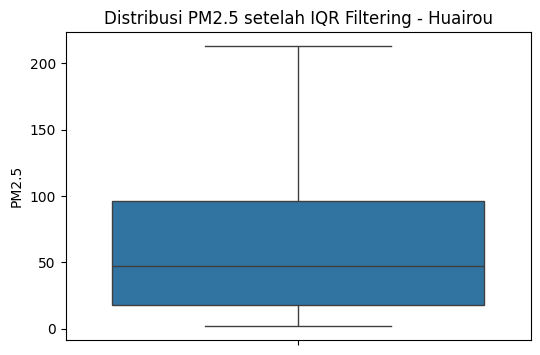

Tiantan dataset setelah IQR filtering. New max: 245.5


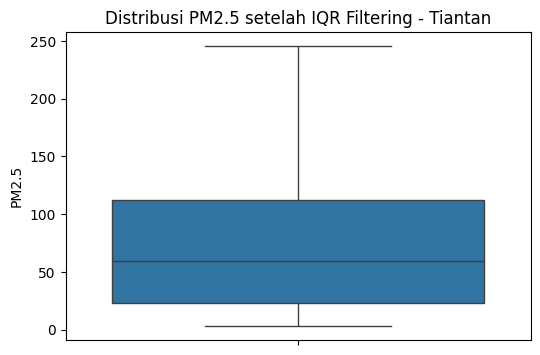

In [57]:
for name, df in datasets.items():
    # Hitung IQR untuk PM2.5
    Q1 = df['PM2.5'].quantile(0.25)
    Q3 = df['PM2.5'].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas outlier
    minimum = Q1 - 1.5 * IQR
    maximum = Q3 + 1.5 * IQR

    # Batasi nilai dalam rentang IQR
    df['PM2.5'] = df['PM2.5'].clip(lower=minimum, upper=maximum)

    print(f"{name} dataset setelah IQR filtering. New max: {df['PM2.5'].max()}")

    # Plot untuk melihat distribusi setelah filtering
    plt.figure(figsize=(6, 4))
    sns.boxplot(df['PM2.5'])
    plt.title(f"Distribusi PM2.5 setelah IQR Filtering - {name}")
    plt.show()

In [58]:
# Simpan dataset yang sudah bersih
cleaned_data_path = "dashboard/"  # Folder penyimpanan

# Pastikan folder "data" ada
import os
if not os.path.exists(cleaned_data_path):
    os.makedirs(cleaned_data_path)

# Simpan setiap dataset ke dalam CSV
for name, df in datasets.items():
    file_path = f"{cleaned_data_path}{name.lower()}.csv"  # Simpan nama file dengan huruf kecil
    df.to_csv(file_path, index=False)
    print(f"✅ {name} dataset berhasil disimpan di {file_path}")


✅ Dongsi dataset berhasil disimpan di dashboard/dongsi.csv
✅ Huairou dataset berhasil disimpan di dashboard/huairou.csv
✅ Tiantan dataset berhasil disimpan di dashboard/tiantan.csv


**Insight:**
- **Data Sudah Bebas dari Missing Values**
- **Beberapa data yang tidak akan digunakan dalam proses analisis dibuang**

## Exploratory Data Analysis (EDA)

### Explore ...

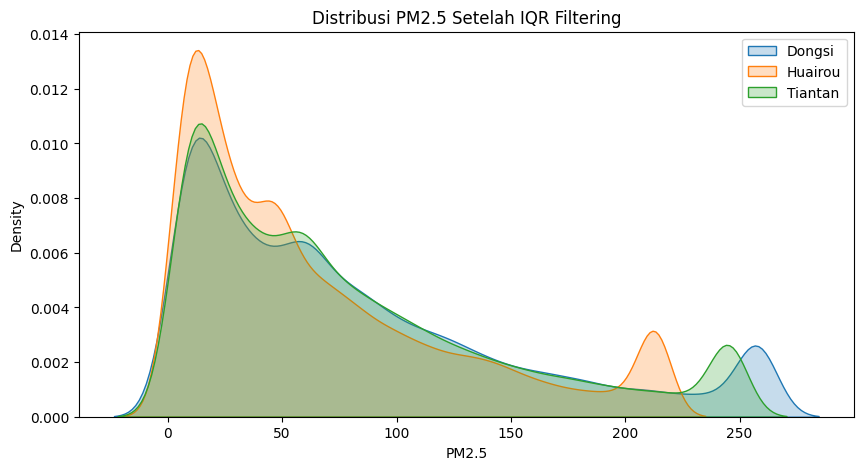

In [40]:
plt.figure(figsize=(10, 5))
for name, df in datasets.items():
    sns.kdeplot(df['PM2.5'], label=name, fill=True)

plt.title("Distribusi PM2.5 Setelah IQR Filtering")
plt.xlabel("PM2.5")
plt.ylabel("Density")
plt.legend()
plt.show()

**Insight:**
- Distribusi paling banyak untuk ketiga distrik di bawah 50 PM2.5
- Huairou lebih dominan lebih kecil daripada kedua distrik lain.
- Dongsi lebih dominan paling besar daripada kedua distrik lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Which district experiences the highest PM2.5 levels?

C:\Users\rakha\AppData\Local\Temp\ipykernel_15864\1886851788.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_pm25_by_district.keys()), y=list(avg_pm25_by_district.values()), palette=colors)


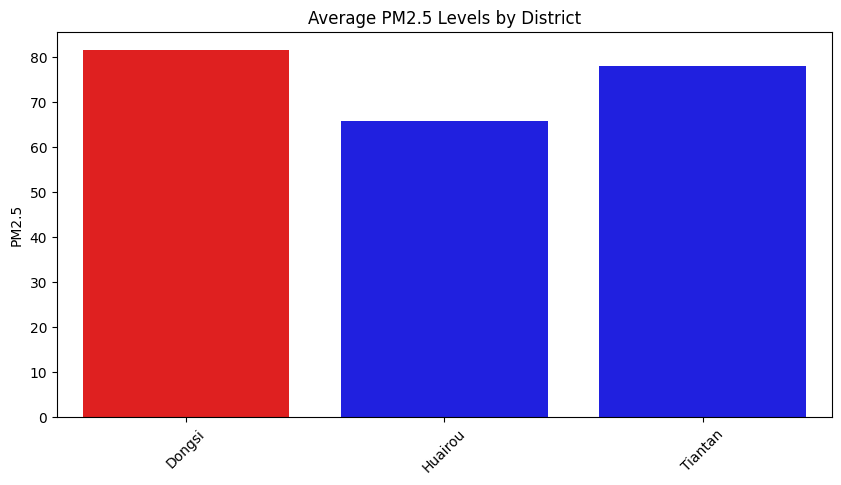

In [61]:
# Menghitung rata-rata PM2.5 per distrik
avg_pm25_by_district = {name: df['PM2.5'].mean() for name, df in datasets.items()}

# Mencari distrik dengan PM2.5 terendah
max_district = max(avg_pm25_by_district, key=avg_pm25_by_district.get)

# Menentukan warna (hijau untuk yang terendah, biru untuk lainnya)
colors = ['red' if district == max_district else 'blue' for district in avg_pm25_by_district.keys()]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=list(avg_pm25_by_district.keys()), y=list(avg_pm25_by_district.values()), palette=colors)

# Rotasi label x agar lebih terbaca
plt.xticks(rotation=45)

# Judul dan label
plt.title("Average PM2.5 Levels by District")
plt.ylabel("PM2.5")

plt.show()



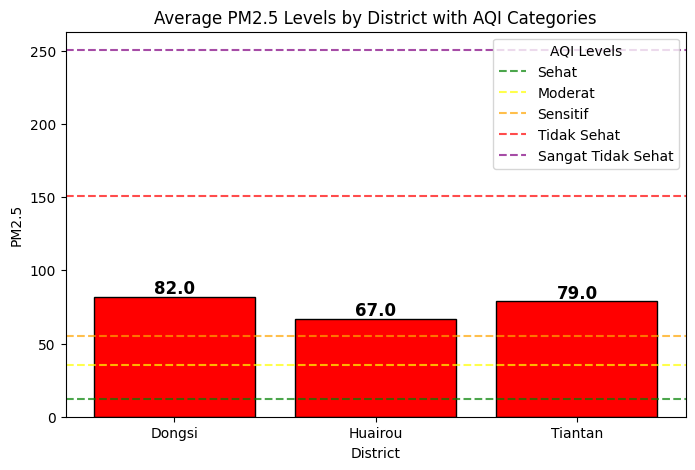

In [62]:
# Contoh data rata-rata PM2.5 per distrik
data = {
    'District': ['Dongsi', 'Huairou', 'Tiantan'],
    'PM2.5': [82, 67, 79]  # Sesuaikan dengan data asli
}

df = pd.DataFrame(data)

# Konversi PM2.5 ke AQI (berdasarkan rumus standar EPA)
def pm25_to_aqi(pm25):
    if pm25 <= 12: return 'Green'  # Sehat
    elif pm25 <= 35.4: return 'Yellow'  # Moderat
    elif pm25 <= 55.4: return 'Orange'  # Tidak sehat bagi kelompok sensitif
    elif pm25 <= 150.4: return 'Red'  # Tidak sehat
    elif pm25 <= 250.4: return 'Purple'  # Sangat tidak sehat
    else: return 'Maroon'  # Berbahaya

# Tentukan warna berdasarkan AQI kategori
aqi_colors = {
    'Green': '#00E400',
    'Yellow': '#FFFF00',
    'Orange': '#FF7E00',
    'Red': '#FF0000',
    'Purple': '#8F3F97',
    'Maroon': '#7E0023'
}

df['AQI_Category'] = df['PM2.5'].apply(pm25_to_aqi)
df['Color'] = df['AQI_Category'].map(aqi_colors)

# Plot grafik batang
plt.figure(figsize=(8, 5))
bars = plt.bar(df['District'], df['PM2.5'], color=df['Color'], edgecolor='black')

# Tambahkan garis referensi AQI kategori
aqi_levels = [12, 35.4, 55.4, 150.4, 250.4]
aqi_labels = ['Sehat', 'Moderat', 'Sensitif', 'Tidak Sehat', 'Sangat Tidak Sehat']
colors = ['green', 'yellow', 'orange', 'red', 'purple']

for level, label, color in zip(aqi_levels, aqi_labels, colors):
    plt.axhline(y=level, linestyle='--', color=color, alpha=0.7, label=label)

# Tambahkan label nilai di atas batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{bar.get_height():.1f}', ha='center', fontsize=12, fontweight='bold')

# Judul dan label
plt.title('Average PM2.5 Levels by District with AQI Categories')
plt.xlabel('District')
plt.ylabel('PM2.5')

# Tampilkan legenda
plt.legend(title="AQI Levels", loc='upper right')

# Tampilkan plot
plt.show()


### Pertanyaan 2: Does meteorological factor effects PM2.5 pollution?

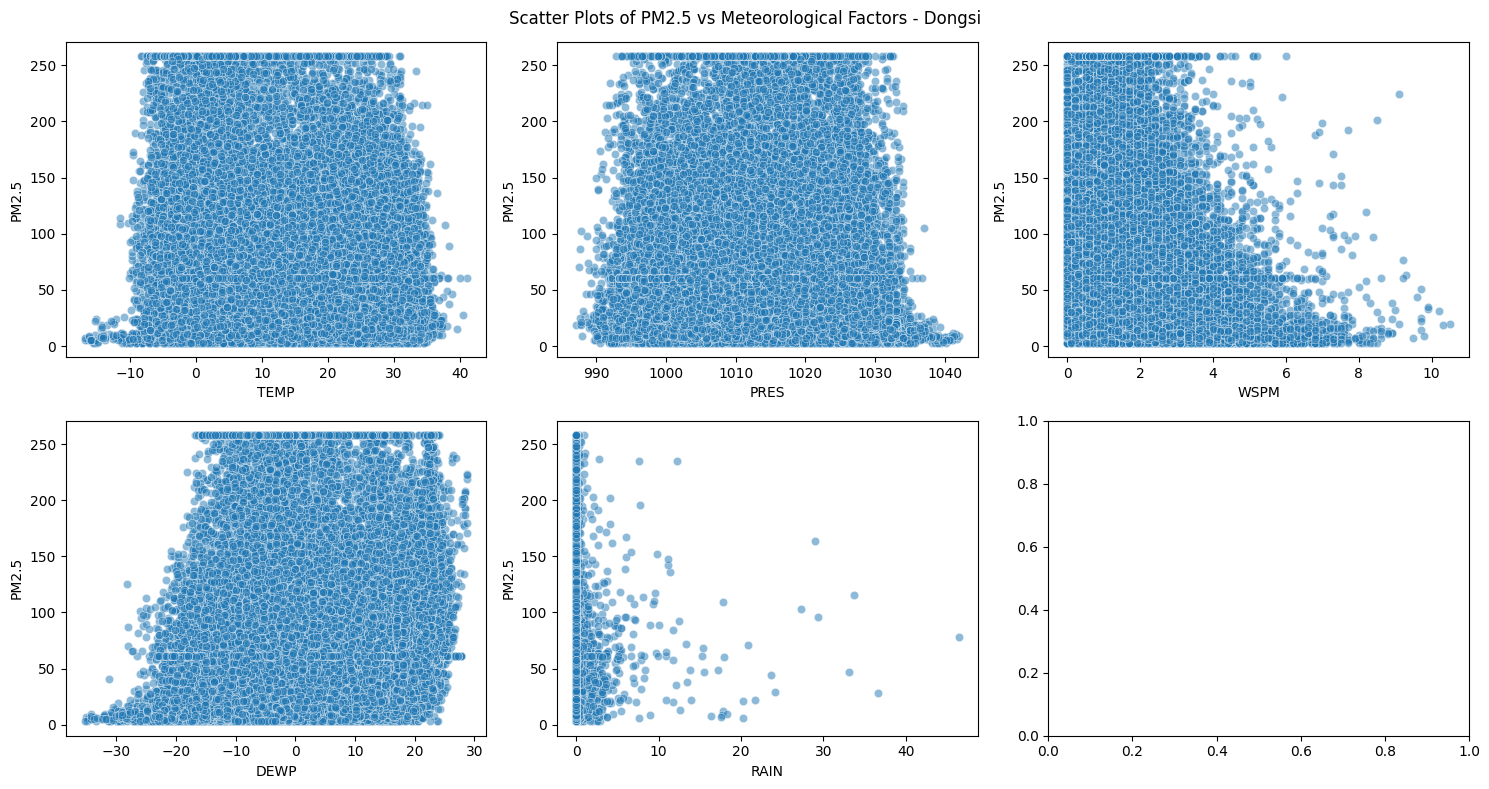

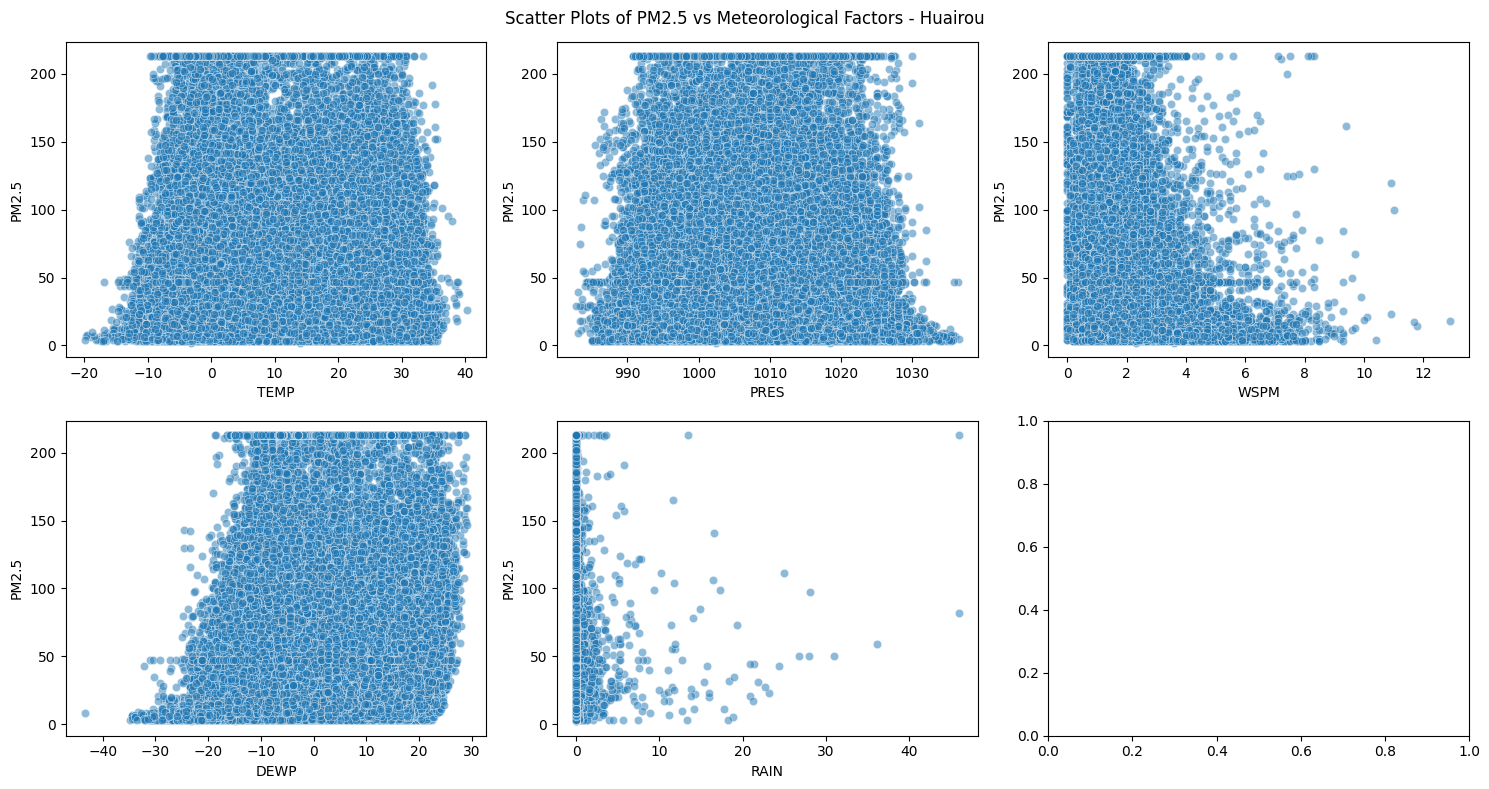

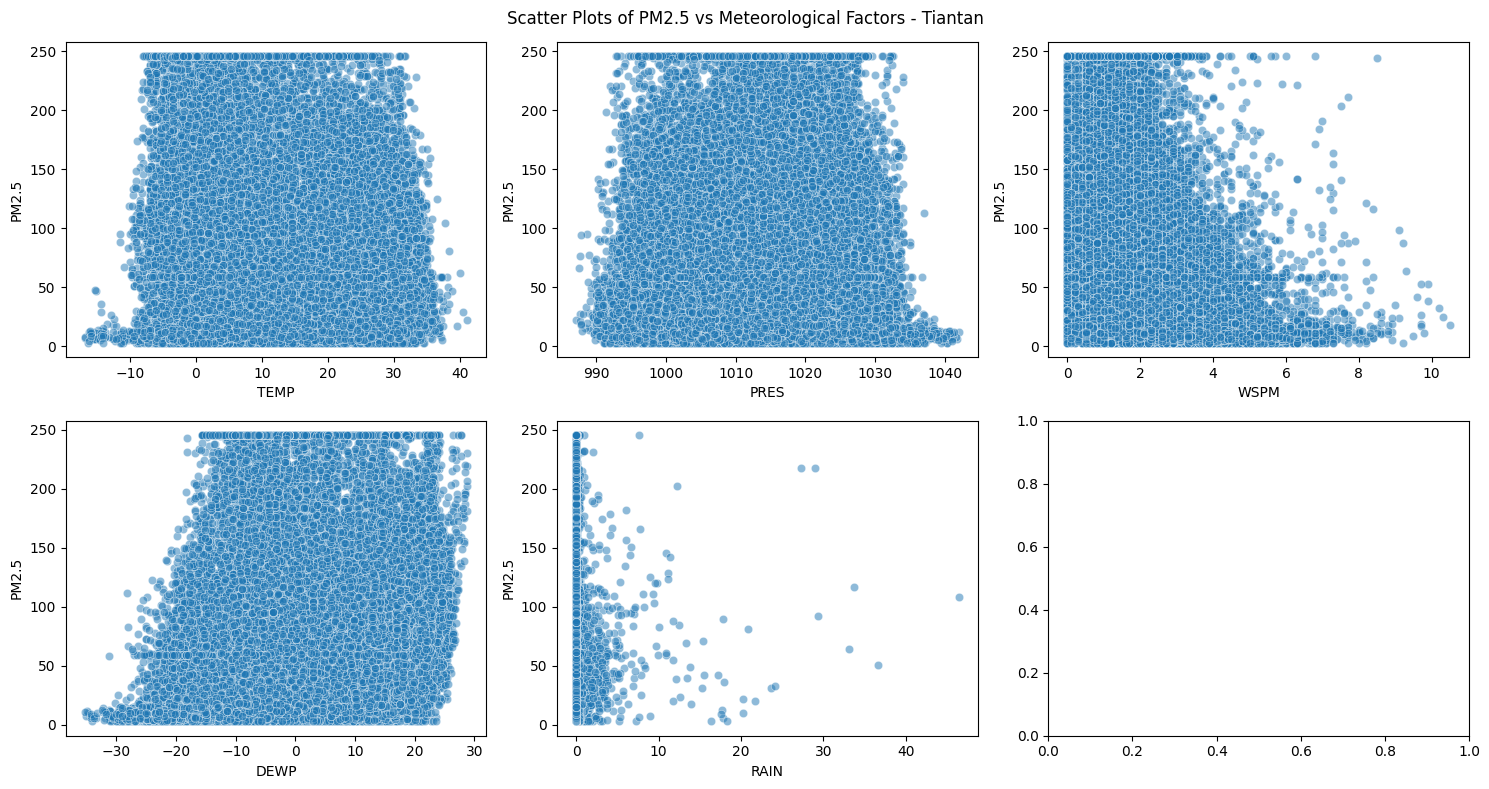

In [63]:
for name, df in datasets.items():
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Create subplots
    fig.suptitle(f"Scatter Plots of PM2.5 vs Meteorological Factors - {name}")

    variables = ['TEMP', 'PRES', 'WSPM', 'DEWP', 'RAIN']
    axes = axes.flatten()  # Flatten the 2D subplot array

    for i, var in enumerate(variables):
        sns.scatterplot(x=df[var], y=df['PM2.5'], ax=axes[i], alpha=0.5)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('PM2.5')

    plt.tight_layout()
    plt.show()


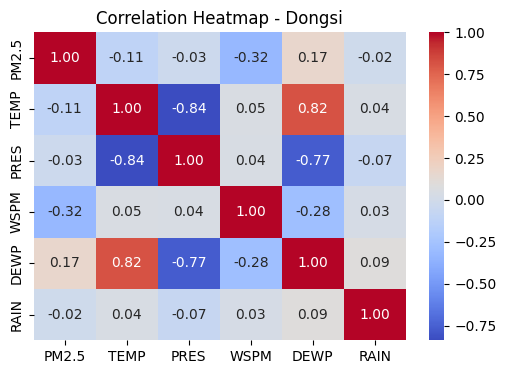

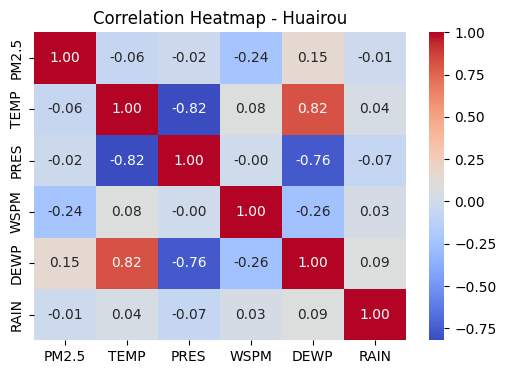

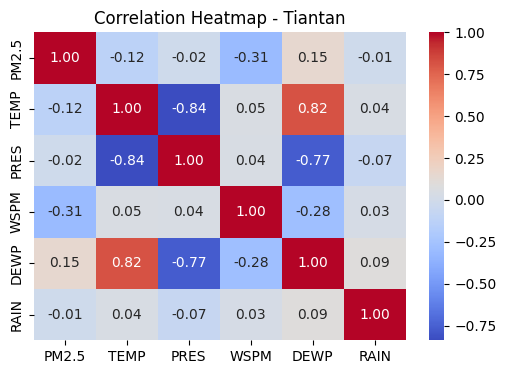

In [44]:
for name, df in datasets.items():
    correlation = df[['PM2.5', 'TEMP', 'PRES', 'WSPM', 'DEWP', 'RAIN']].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap - {name}")
    plt.show()


### Pertanyaan 3: Are there specific hours of the day with dangerous PM2.5 levels?

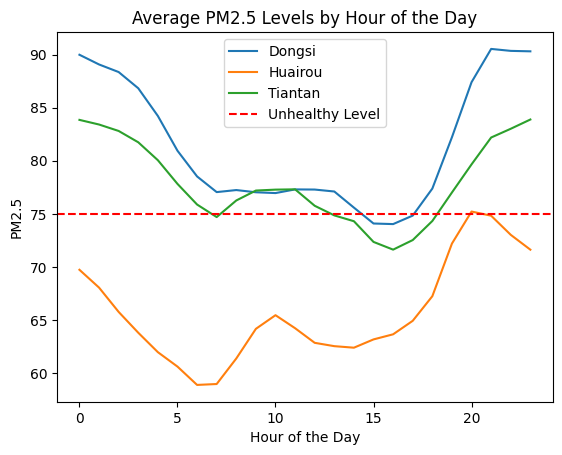

In [60]:
for name, df in datasets.items():
    df['hour'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']]).dt.hour
    hourly_avg = df.groupby('hour')['PM2.5'].mean()
    
    plt.plot(hourly_avg, label=name)

plt.axhline(y=75, color='r', linestyle='--', label="Unhealthy Level")  # WHO standard
plt.xlabel("Hour of the Day")
plt.ylabel("PM2.5")
plt.legend()
plt.title("Average PM2.5 Levels by Hour of the Day")
plt.show()

## Analisis Lanjutan (Penggunaan geospasial)

In [59]:
import folium

# Definisikan koordinat distrik
district_locations = {
    "Dongsi": {"lat": 39.929, "lon": 116.417},
    "Huairou": {"lat": 40.317, "lon": 116.637},
    "Tiantan": {"lat": 39.886, "lon": 116.412}
}

# Hitung rata-rata PM2.5 per distrik
avg_pm25_by_district = {name: df["PM2.5"].mean() for name, df in datasets.items()}


# Fungsi untuk mengubah PM2.5 ke warna AQI
def pm25_to_color(pm25):
    if pm25 <= 12: return 'Green'  # Sehat
    elif pm25 <= 35.4: return 'Yellow'  # Moderat
    elif pm25 <= 55.4: return 'Orange'  # Tidak sehat bagi kelompok sensitif
    elif pm25 <= 150.4: return 'Red'  # Tidak sehat
    elif pm25 <= 250.4: return 'Purple'  # Sangat tidak sehat
    else: return 'Maroon'  # Berbahaya

# Buat peta interaktif dengan Folium
m = folium.Map(location=[39.9, 116.4], zoom_start=10)

# Tambahkan titik untuk setiap distrik
for district, pm25 in avg_pm25_by_district.items():
    if district in district_locations:
        lat, lon = district_locations[district]["lat"], district_locations[district]["lon"]
        color = pm25_to_color(pm25)

        folium.CircleMarker(
            location=[lat, lon],
            radius=20,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"{district}: {pm25:.2f} µg/m³"
        ).add_to(m)
    else:
        print(f"⚠️ Distrik {district} tidak ditemukan dalam district_locations!")

# Tampilkan peta
m


**Insight:**  
- Kecepatan angin berpengaruh negatif pada PM2.5 (semakin tinggi angin, semakin bersih udara).   
- Kelembaban dan titik embun mungkin berpengaruh terhadap polusi udara.  
- Suhu bisa memiliki hubungan berbentuk U dengan PM2.5 (tinggi pada suhu ekstrem).  
- Tekanan udara dan hujan tidak menunjukkan hubungan yang kuat dengan PM2.5.  
- Geospatial Analysis membantu memahami distribusi polusi udara berdasarkan lokasi.
- Warna pada peta menunjukkan tingkat bahaya polusi di setiap distrik.

## Conclusion

### Kesimpulan dari pertanyaan 1  
- Dari analisis yang dilakukan, terlihat bahwa tingkat PM2.5 bervariasi di setiap distrik. Distrik **Dongsi** dan **Tiantan** memiliki tingkat PM2.5 yang lebih tinggi dibandingkan **Huairou**.  Dengan Dongsi sebagai yang paling tinggi.
- Jika dibandingkan dengan indeks AQI, setiap harinya beberapa distrik masuk dalam kategori **"Unhealthy for Sensitive Groups"** atau bahkan **"Unhealthy,"** yang menunjukkan adanya risiko kesehatan.  

### Kesimpulan dari pertanyaan 2  
- Dengan melihat korelasi, ditemukan bahwa faktor-faktor tertentu seperti **kelembaban** dan **kecepatan angin** berpengaruh pada konsentrasi PM2.5.  Jadi, beberapa meteorological factor memang mempengaruhi, namun sebagian juga tidak.

### Kesimpulan dari pertanyaan 3 
- Pola harian PM2.5 bervariasi di setiap distrik, dengan level tertinggi terjadi pada malam hingga pagi hari, menurun di siang hari, dan meningkat kembali pada malam hari. 
- Dongsi dan Tiantan sering melewati batas "Unhealthy" (75 µg/m³), sedangkan Huairou lebih rendah tetapi tetap mengalami peningkatan pada malam hari.